In [15]:
import numpy as np
import pandas as pd
# matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from google.cloud import bigquery
from bq_helper import BigQueryHelper
%load_ext google.cloud.bigquery
import os


os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="My Project-bbdce7b1712b.json"


The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [18]:
bq_assistant = BigQueryHelper("bigquery-public-data", "epa_historical_air_quality")

query="""
SELECT * FROM `bigquery-public-data.epa_historical_air_quality.co_daily_summary`
where state_name ="California" AND city_name="San Francisco"
"""

df = bq_assistant.query_to_pandas(query)
##df=pd.read_csv('carbon-monoxide-results-20181007-145932.csv')

In [19]:
df

,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,...,aqi,method_code,method_name,local_site_name,address,state_name,county_name,city_name,cbsa_name,date_of_last_change
0,06,075,0005,42101,1,37.765946,-122.399044,WGS84,Carbon monoxide,1 HOUR,...,NaN,54.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,San Francisco,10 ARKANSAS ST.,California,San Francisco,San Francisco,"San Francisco-Oakland-Hayward, CA",2016-04-07
1,06,075,0005,42101,1,37.765946,-122.399044,WGS84,Carbon monoxide,1 HOUR,...,NaN,54.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,San Francisco,10 ARKANSAS ST.,California,San Francisco,San Francisco,"San Francisco-Oakland-Hayward, CA",2016-04-07
2,06,075,0005,42101,1,37.765946,-122.399044,WGS84,Carbon monoxide,1 HOUR,...,NaN,54.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,San Francisco,10 ARKANSAS ST.,California,San Francisco,San Francisco,"San Francisco-Oakland-Hayward, CA",2016-04-07
3,06,075,0005,42101,1,37.765946,-122.399044,WGS84,Carbon monoxide,1 HOUR,...,NaN,54.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,San Francisco,10 ARKANSAS ST.,California,San Francisco,San Francisco,"San Francisco-Oakland-Hayward, CA",2016-04-07
4,06,075,0005,42101,1,37.765946,-122.399044,WGS84,Carbon monoxide,1 HOUR,...,NaN,54.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,San Francisco,10 ARKANSAS ST.,California,San Francisco,San Francisco,"San Francisco-Oakland-Hayward, CA",2016-04-07
5,06,075,0005,42101,1,37.765946,-122.399044,WGS84,Carbon monoxide,1 HOUR,...,NaN,54.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,San Francisco,10 ARKANSAS ST.,California,San Francisco,San Francisco,"San Francisco-Oakland-Hayward, CA",2016-04-07
6,06,075,0005,42101,1,37.765946,-122.399044,WGS84,Carbon monoxide,1 HOUR,...,NaN,54.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,San Francisco,10 ARKANSAS ST.,California,San Francisco,San Francisco,"San Francisco-Oakland-Hayward, CA",2016-04-07
7,06,075,0005,42101,1,37.765946,-122.399044,WGS84,Carbon monoxide,1 HOUR,...,NaN,54.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,San Francisco,10 ARKANSAS ST.,California,San Francisco,San Francisco,"San Francisco-Oakland-Hayward, CA",2016-04-07
8,06,075,0005,42101,1,37.765946,-122.399044,WGS84,Carbon monoxide,1 HOUR,...,NaN,54.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,San Francisco,10 ARKANSAS ST.,California,San Francisco,San Francisco,"San Francisco-Oakland-Hayward, CA",2016-04-07
9,06,075,0005,42101,1,37.765946,-122.399044,WGS84,Carbon monoxide,1 HOUR,...,NaN,54.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,San Francisco,10 ARKANSAS ST.,California,San Francisco,San Francisco,"San Francisco-Oakland-Hayward, CA",2016-04-07


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32794 entries, 0 to 32793
Data columns (total 29 columns):
state_code             32794 non-null object
county_code            32794 non-null object
site_num               32794 non-null object
parameter_code         32794 non-null int64
poc                    32794 non-null int64
latitude               32794 non-null float64
longitude              32794 non-null float64
datum                  32794 non-null object
parameter_name         32794 non-null object
sample_duration        32794 non-null object
pollutant_standard     32794 non-null object
date_local             32794 non-null object
units_of_measure       32794 non-null object
event_type             32794 non-null object
observation_count      32794 non-null int64
observation_percent    32794 non-null float64
arithmetic_mean        32794 non-null float64
first_max_value        32794 non-null float64
first_max_hour         32794 non-null int64
aqi                    16398 non-nu

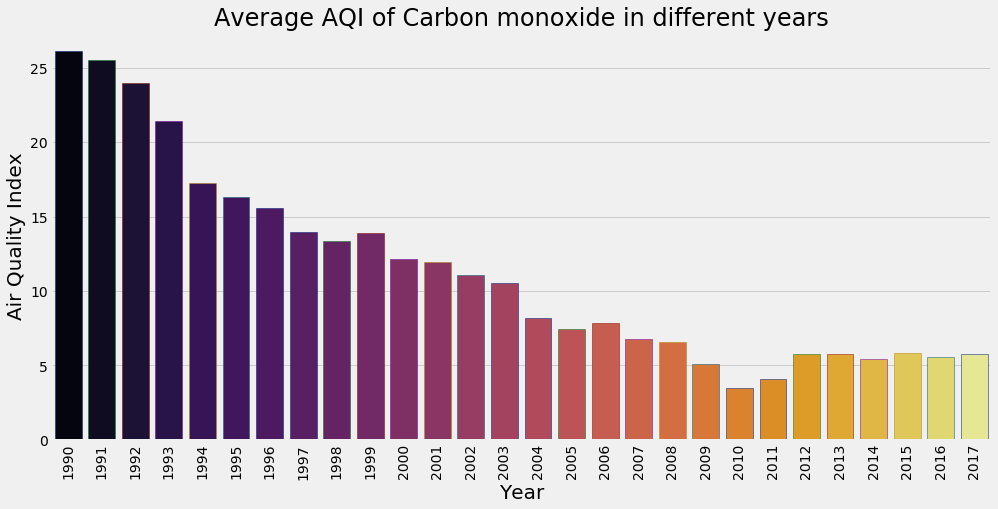

In [24]:
QUERY = """
    SELECT
        EXTRACT(YEAR FROM date_local) as year,
        avg(aqi) as avg_aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.co_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY year
    ORDER BY year ASC
        """
df_co = bq_assistant.query_to_pandas(QUERY)

plt.subplots(figsize=(15,7))
sns.barplot(x='year',y='avg_aqi',data=df_co,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Air Quality Index', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Year', fontsize=20)
plt.title('Average AQI of Carbon monoxide in different years', fontsize=24)
plt.show()



In [5]:
df.isnull().sum()

state_code               0
county_code              0
site_num                 0
parameter_code           0
poc                      0
latitude                 0
longitude                0
datum                    0
parameter_name           0
sample_duration          0
pollutant_standard       0
date_local               0
units_of_measure         0
event_type               0
observation_count        0
observation_percent      0
arithmetic_mean          0
first_max_value          0
first_max_hour           0
aqi                    730
method_code            730
method_name              0
local_site_name          0
address                  0
state_name               0
county_name              0
city_name                0
cbsa_name                0
date_of_last_change      0
dtype: int64

In [23]:
## Fill missing values with zero
df["aqi"].fillna(0, inplace=True)
df["method_code"].fillna(0, inplace=True)


In [24]:
df.describe()

,parameter_code,poc,latitude,longitude,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code
count,732.0,732.0,7.320000e+02,7.320000e+02,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,42101.0,1.0,3.776595e+01,-1.223990e+02,23.250000,96.969945,0.394013,0.535519,6.495902,2.790984,27.000000
std,0.0,0.0,2.630806e-13,9.101166e-13,1.472618,6.081226,0.115538,0.234087,6.838671,3.160768,27.018462
min,42101.0,1.0,3.776595e+01,-1.223990e+02,7.000000,29.000000,0.170833,0.200000,0.000000,0.000000,0.000000
25%,42101.0,1.0,3.776595e+01,-1.223990e+02,23.000000,96.000000,0.304348,0.400000,0.000000,0.000000,0.000000
50%,42101.0,1.0,3.776595e+01,-1.223990e+02,23.000000,96.000000,0.373913,0.500000,5.000000,1.000000,27.000000
75%,42101.0,1.0,3.776595e+01,-1.223990e+02,24.000000,100.000000,0.466667,0.600000,8.000000,5.000000,54.000000
max,42101.0,1.0,3.776595e+01,-1.223990e+02,24.000000,100.000000,0.783333,1.700000,23.000000,13.000000,54.000000


In [97]:
columns = df.columns
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True)


In [98]:
missing_value_df

,column_name,percent_missing
state_code,state_code,0.0
city_name,city_name,0.0
county_name,county_name,0.0
state_name,state_name,0.0
address,address,0.0
local_site_name,local_site_name,0.0
method_name,method_name,0.0
method_code,method_code,0.0
aqi,aqi,0.0
first_max_hour,first_max_hour,0.0


In [99]:
from sklearn.preprocessing import Imputer

imp=Imputer(missing_values='NaN',strategy='mean')

df["aqi"]=imp.fit_transform(df[["aqi"]]).ravel()
df["method_code"]=imp.fit_transform(df[["method_code"]]).ravel()


In [7]:
set(df['county_code'])

{'075'}

In [28]:
df.nunique()

state_code               1
county_code              1
site_num                 1
parameter_code           1
poc                      1
latitude                 1
longitude                1
datum                    1
parameter_name           1
sample_duration          2
pollutant_standard       2
date_local             366
units_of_measure         1
event_type               1
observation_count       13
observation_percent     13
arithmetic_mean        232
first_max_value         15
first_max_hour          24
aqi                     11
method_code              2
method_name              2
local_site_name          1
address                  1
state_name               1
county_name              1
city_name                1
cbsa_name                1
date_of_last_change      1
dtype: int64